In [20]:
import numpy as np
import os
from scipy.misc.pilutil import imread, imresize
import matplotlib.pyplot as plt
cwd = os.getcwd()


In [21]:
paths = ['작업실/jupyter/person/Jui'
        ,'작업실/jupyter/person/Kana Momonogi'
        ,'작업실/jupyter/person/Michael Jeffrey Jordan'
        ,'작업실/jupyter/person/Steve Paul Jobs'
        ,'작업실/jupyter/person/You Jae seok']
categories = ['Jui', 'Momonogi', 'Jordan', 'Jobs', 'Jae seok']
#CONFIGURATION
imgsize = [64, 64]
use_gray = 0
data_name = 'custom_data'

print ("Your images should be at")
for i, path in enumerate(paths):
    print (" [%d/%d] %s/%s" % (i, len(paths), cwd, path)) 

print ("Data will be saved to %s" 
       % (cwd + '/data/' + data_name + '.npz'))


Your images should be at
 [0/5] C:\Users\15U560\Desktop/작업실/jupyter/person/Jui
 [1/5] C:\Users\15U560\Desktop/작업실/jupyter/person/Kana Momonogi
 [2/5] C:\Users\15U560\Desktop/작업실/jupyter/person/Michael Jeffrey Jordan
 [3/5] C:\Users\15U560\Desktop/작업실/jupyter/person/Steve Paul Jobs
 [4/5] C:\Users\15U560\Desktop/작업실/jupyter/person/You Jae seok
Data will be saved to C:\Users\15U560\Desktop/data/custom_data.npz


In [22]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
    else:
        return rgb

## load images

In [23]:
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        currimg  = imread(fullpath)
        # Convert to grayscale  
        if use_gray:
            grayimg  = rgb2gray(currimg)
        else:
            grayimg  = currimg
        # Reshape
        graysmall = imresize(grayimg, [imgsize[0], imgsize[1]])/255.
        grayvec   = np.reshape(graysmall, (1, -1))
        # Save 
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = grayvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, grayvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt    = imgcnt + 1
print ("Total %d images loaded." % (imgcnt))

C:\Users\15U560\Anaconda3\Scripts\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\15U560\Anaconda3\Scripts\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Total 390 images loaded.


## divide into training and test

In [24]:
def print_shape(string, x):
    print ("Shape of '%s' is %s" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(3*imgcnt/5)]
testidx    = randidx[int(3*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

Shape of 'trainimg' is (234, 12288)
Shape of 'trainlabel' is (234, 5)
Shape of 'testimg' is (156, 12288)
Shape of 'testlabel' is (156, 5)


## save to npz

In [25]:
savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
         , testimg=testimg, testlabel=testlabel, imgsize=imgsize, use_gray=use_gray, categories=categories)
print ("Saved to %s" % (savepath))

Saved to C:\Users\15U560\Desktop/data/custom_data.npz


## load to check!

In [7]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
l = np.load(loadpath)

# See what's in here
l.files

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))


234 train images loaded
156 test images loaded
Loaded from to C:\Users\15U560\Desktop/data/custom_data.npz


## plot randomly selected train images

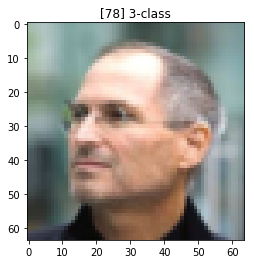

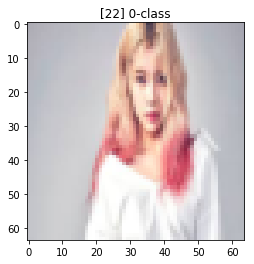

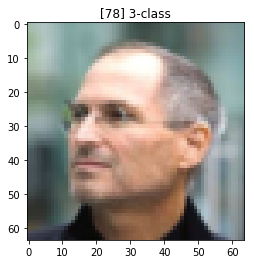

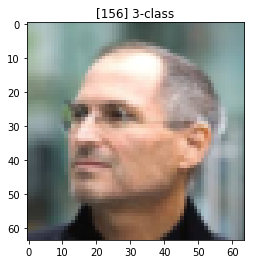

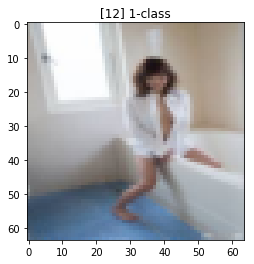

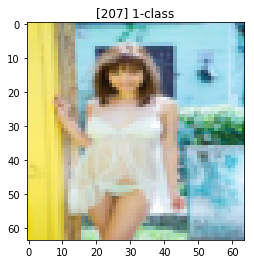

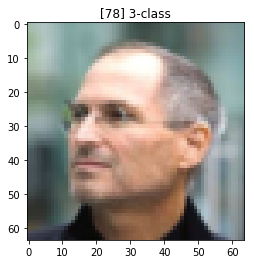

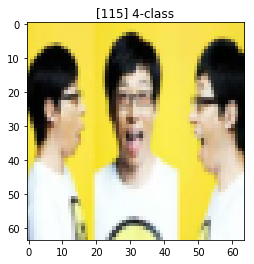

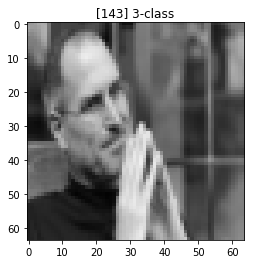

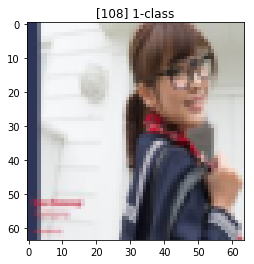

In [8]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 10;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

## plot randomly selected test images

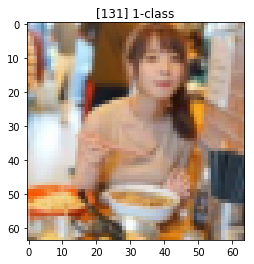

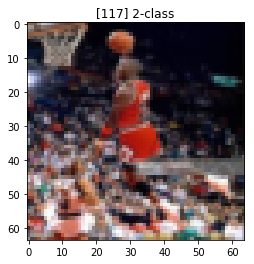

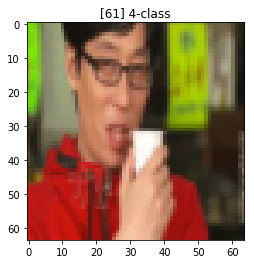

In [9]:
# Do batch stuff using loaded data 
ntest_loaded = testimg_loaded.shape[0]
batch_size   = 3;
randidx      = np.random.randint(ntest_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(testimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = testlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    if use_gray:
        currimg = np.reshape(testimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(testimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()